<IPython.core.display.Javascript object>


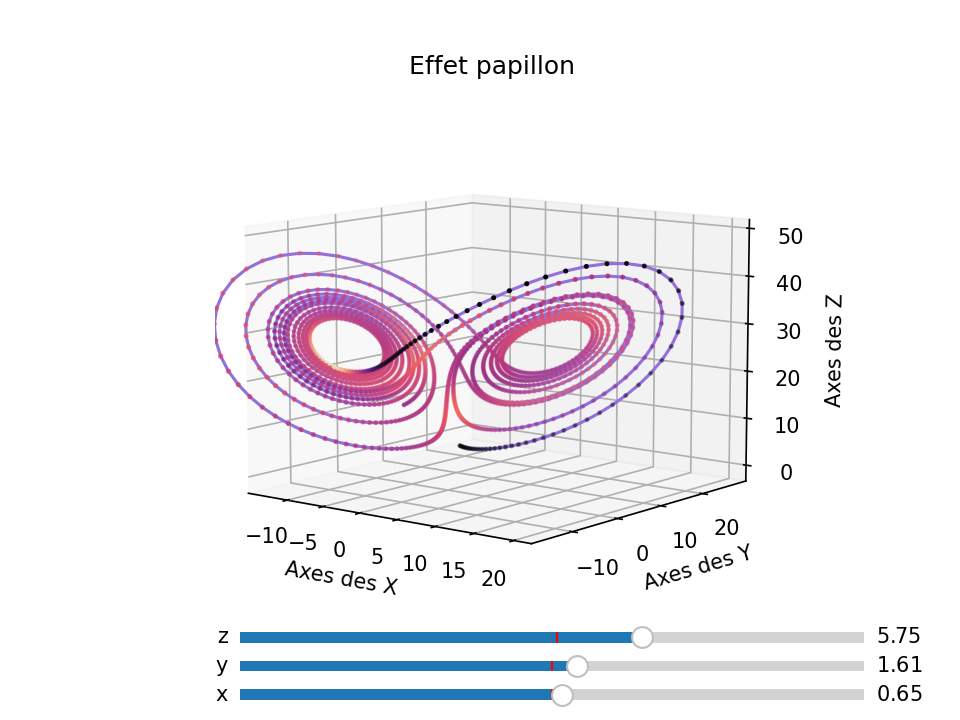

In [3]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.widgets import Slider

sigma = 10
rho = 28
beta = 2.667

def lorenz(etat, t, sigma, rho, beta):
    x, y, z = etat
    deriv_x = sigma*(y - x)
    deriv_y = rho*x - y - x*z
    deriv_z = x*y - beta*z
    return [deriv_x, deriv_y, deriv_z]

dt = 0.01
t = np.arange(0, dt*1500, dt)

etat_initial = [0.0, 0.01, 0.3]

solution = odeint(lorenz, etat_initial, t, args=(sigma, rho, beta))

x = solution[:, 0]
y = solution[:, 1]
z = solution[:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x, y, z, s=2, c=z, cmap='magma')
line, = ax.plot(x, y, z, color='mediumpurple')
ax.set_xlabel("Axes des X")
ax.set_ylabel("Axes des Y")
ax.set_zlabel("Axes des Z")
ax.set_title("Effet papillon")

axcolor = 'goldenrod'
ax_x = plt.axes([0.25, 0.02, 0.65, 0.03], facecolor=axcolor)
ax_y = plt.axes([0.25, 0.06, 0.65, 0.03], facecolor=axcolor)
ax_z = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)

s_x = Slider(ax_x, 'x', -20.0, 20.0, valinit=etat_initial[0])
s_y = Slider(ax_y, 'y', -20.0, 20.0, valinit=etat_initial[1])
s_z = Slider(ax_z, 'z', -20.0, 20.0, valinit=etat_initial[2])

def update(val):
    etat_initial = [s_x.val, s_y.val, s_z.val]
    solution = odeint(lorenz, etat_initial, t, args=(sigma, rho, beta))
    x = solution[:, 0]
    y = solution[:, 1]
    z = solution[:, 2]

    scatter._offsets3d = (x, y, z)
    line.set_data(x, y)
    line.set_3d_properties(z)
    fig.canvas.draw_idle()

s_x.on_changed(update)
s_y.on_changed(update)
s_z.on_changed(update)

plt.show()
